# Factory Method

Factory Method

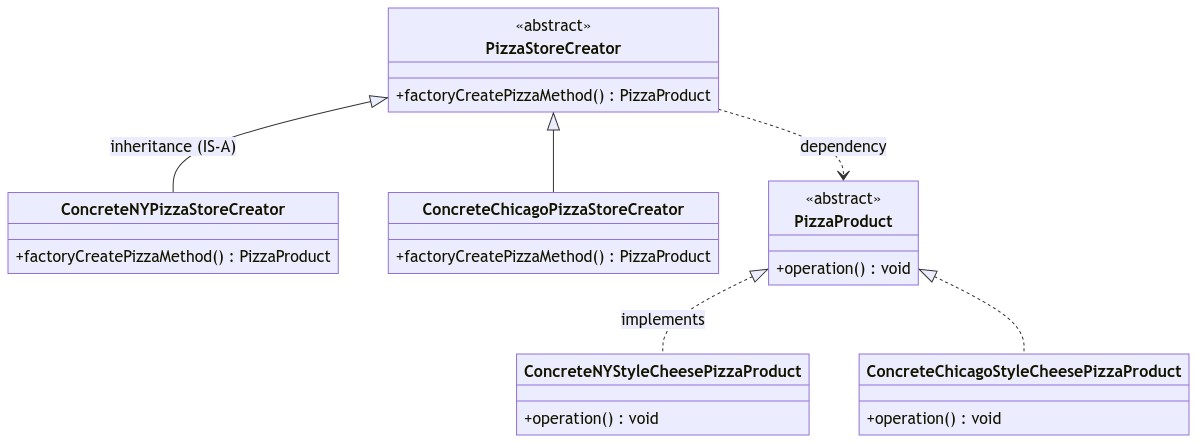

In [ ]:
//#region Code

abstract class PizzaStoreCreator {
  abstract factoryCreatePizzaMethod(item: string): PizzaProduct;
}

abstract class PizzaProduct {
  name: string;
  dough: string;
  sauce: string;
  toppings: string[] = [];

  prepare() {
    console.log(`Preparing ${this.name}`);
    console.log('Tossing dough...');
    console.log('Adding sauce...');
    console.log('Adding toppings:');
    this.toppings.forEach(topping => {
      console.log(`  ${topping}`);
    });
  }

  bake() {
    console.log('Bake for 25 minutes at 350 degrees');
  }

  cut() {
    console.log('Cutting the pizza into diagonal slices');
  }

  box() {
    console.log('Placing pizza in official PizzaStore box');
  }

  getName(): string {
    return this.name;
  }
}

//#region Concrete Creators

class ConcreteNYPizzaStoreCreator extends PizzaStoreCreator {
  factoryCreatePizzaMethod(item: string): PizzaProduct {
    let pizzaProduct: PizzaProduct;

    switch (item) {
      case 'cheese':
        pizzaProduct = new ConcreteNYStyleCheesePizzaProduct();
        break;
      case 'pepperoni':
        pizzaProduct = new ConcreteNYStylePepperoniPizzaProduct();
        break;
      default:
        throw new Error('Invalid pizza type');
    }

    return pizzaProduct;
  }
}

class ConcreteChicagoPizzaStoreCreator extends PizzaStoreCreator {
  factoryCreatePizzaMethod(item: string): PizzaProduct {
    let pizzaProduct: PizzaProduct;

    switch (item) {
      case 'cheese':
        pizzaProduct = new ConcreteChicagoStyleCheesePizzaProduct();
        break;
      case 'pepperoni':
        pizzaProduct = new ConcreteChicagoStylePepperoniPizzaProduct();
        break;
      default:
        throw new Error('Invalid pizza type');
    }

    return pizzaProduct;
  }
}

//#endregion

//#region Concrete Products

class ConcreteNYStyleCheesePizzaProduct extends PizzaProduct {
  constructor() {
    super();
    this.name = 'NY Style Sauce and Cheese Pizza';
    this.dough = 'Thin Crust Dough';
    this.sauce = 'Marinara Sauce';

    this.toppings.push('Grated Reggiano Cheese');
  }
}

class ConcreteNYStylePepperoniPizzaProduct extends PizzaProduct {

	constructor() {
    super();
		this.name = "NY Style Pepperoni Pizza";
		this.dough = "Thin Crust Dough";
		this.sauce = "Marinara Sauce";
 
		this.toppings.push("Grated Reggiano Cheese");
		this.toppings.push("Sliced Pepperoni");
		this.toppings.push("Garlic");
		this.toppings.push("Onion");
		this.toppings.push("Mushrooms");
		this.toppings.push("Red Pepper");
	}
}

class ConcreteChicagoStyleCheesePizzaProduct extends PizzaProduct {
  constructor() {
    super();
    this.name = "Chicago Style Deep Dish Cheese Pizza";
    this.dough = "Extra Thick Crust Dough";
    this.sauce = "Plum Tomato Sauce";
    this.toppings.push("Shredded Mozzarella Cheese");
  }

  cut(): void {
    console.log("Cutting the pizza into square slices");
  }
}

class ConcreteChicagoStylePepperoniPizzaProduct extends PizzaProduct {
  constructor() {
    super();
    this.name = "Chicago Style Pepperoni Pizza";
    this.dough = "Extra Thick Crust Dough";
    this.sauce = "Plum Tomato Sauce";
    this.toppings.push(
      "Shredded Mozzarella Cheese",
      "Black Olives",
      "Spinach",
      "Eggplant",
      "Sliced Pepperoni"
    );
  }

  cut(): void {
    console.log("Cutting the pizza into square slices");
  }
}


//#endregion

//#region Run

const nyStore = new ConcreteNYPizzaStoreCreator();
const chicagoStore = new ConcreteChicagoPizzaStoreCreator();

let pizza = nyStore.factoryCreatePizzaMethod('cheese');

console.log(`Ethan ordered a ${pizza.getName()}\n`);

pizza = chicagoStore.factoryCreatePizzaMethod("cheese");
console.log(`Joel ordered a ${pizza.getName()}\n`);

pizza = nyStore.factoryCreatePizzaMethod("pepperoni");
console.log(`Ethan ordered a ${pizza.getName()}\n`);

pizza = chicagoStore.factoryCreatePizzaMethod("pepperoni");
console.log(`Joel ordered a ${pizza.getName()}\n`);

//#endregion

//#endregion


Ethan ordered a NY Style Sauce and Cheese Pizza

Joel ordered a Chicago Style Deep Dish Cheese Pizza

Ethan ordered a NY Style Pepperoni Pizza

Joel ordered a Chicago Style Pepperoni Pizza



## Refactoring Guru Factory Method in TypeScript

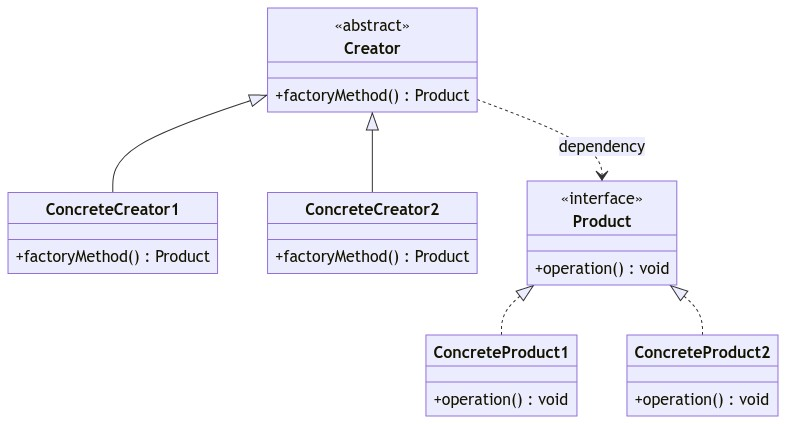


In [ ]:
//#region Code

/**
 * The Creator class declares the factory method that is supposed to return an
 * object of a Product class. The Creator's subclasses usually provide the
 * implementation of this method.
 */
abstract class Creator {
  /**
   * Note that the Creator may also provide some default implementation of the
   * factory method.
   */
  public abstract factoryMethod(): Product;

  /**
   * Also note that, despite its name, the Creator's primary responsibility is
   * not creating products. Usually, it contains some core business logic that
   * relies on Product objects, returned by the factory method. Subclasses can
   * indirectly change that business logic by overriding the factory method
   * and returning a different type of product from it.
   */
  public someOperation(): string {
      // Call the factory method to create a Product object.
      const product = this.factoryMethod();
      // Now, use the product.
      return `Creator: The same creator's code has just worked with ${product.operation()}`;
  }
}

/**
* Concrete Creators override the factory method in order to change the
* resulting product's type.
*/
class ConcreteCreator1 extends Creator {
  /**
   * Note that the signature of the method still uses the abstract product
   * type, even though the concrete product is actually returned from the
   * method. This way the Creator can stay independent of concrete product
   * classes.
   */
  public factoryMethod(): Product {
      return new ConcreteProduct1();
  }
}

class ConcreteCreator2 extends Creator {
  public factoryMethod(): Product {
      return new ConcreteProduct2();
  }
}

/**
* The Product interface declares the operations that all concrete products must
* implement.
*/
interface Product {
  operation(): string;
}

/**
* Concrete Products provide various implementations of the Product interface.
*/
class ConcreteProduct1 implements Product {
  public operation(): string {
      return '{Result of the ConcreteProduct1}';
  }
}

class ConcreteProduct2 implements Product {
  public operation(): string {
      return '{Result of the ConcreteProduct2}';
  }
}

/**
* The client code works with an instance of a concrete creator, albeit through
* its base interface. As long as the client keeps working with the creator via
* the base interface, you can pass it any creator's subclass.
*/
function clientCode(creator: Creator) {
  // ...
  console.log('Client: I\'m not aware of the creator\'s class, but it still works.');
  console.log(creator.someOperation());
  // ...
}

/**
* The Application picks a creator's type depending on the configuration or
* environment.
*/
console.log('App: Launched with the ConcreteCreator1.');
clientCode(new ConcreteCreator1());
console.log('');

console.log('App: Launched with the ConcreteCreator2.');
clientCode(new ConcreteCreator2());

//#endregion


App: Launched with the ConcreteCreator1.
Client: I'm not aware of the creator's class, but it still works.
Creator: The same creator's code has just worked with {Result of the ConcreteProduct1}

App: Launched with the ConcreteCreator2.
Client: I'm not aware of the creator's class, but it still works.
Creator: The same creator's code has just worked with {Result of the ConcreteProduct2}
